In [31]:
import os
import glob
import cv2
import numpy as np
import skimage
from skimage.measure import label, regionprops
import matplotlib.pyplot as plt

In [20]:
src_path = '/data1/huangkaibin/karyotype/r_data/imageK/'
tar_path = '/data1/huangkaibin/karyotype/r_data/imageA/'

src_names = sorted(glob.glob(os.path.join(src_path, '*')))
tar_names = sorted(glob.glob(os.path.join(tar_path, '*')))
print(len(src_names))
print(len(tar_names))

195
195


In [39]:
def clearBoxAndNum(imageK):

    image = imageK.copy()
    x, y = image.shape[:2]
    low_idxs, y_sum = [], []
    for i in range(x):
        y_sum.append(sum(image[i, :])/y)
        if y_sum[-1] < 100:
            low_idxs.append(i)

    for low_idx in low_idxs:
        image[low_idx:low_idx+40, :] = 255

    return image

def threshold_segm_for_src(img, threshold=250):

    image = img.copy()

    image = clearBoxAndNum(image)
    image[image==0] = 255
    mask = 255 * (image < threshold).astype(np.uint8)

    return mask

def showSpecificArea(image, bbox, bg):
    x1, y1, x2, y2 = bbox
    img = image.copy()
    img[:x1,:] = bg
    img[x2:,:] = bg
    img[:,:y1] = bg
    img[:,y2:] = bg
    return img

def findNearestPoint(theClassBottomPoint, bbox):
    minr, minc, maxr, maxc = bbox
    y = (maxr, (minc+maxc)//2)
    dis = [np.linalg.norm(x-y) for x in theClassBottomPoint]
    return np.argmin(dis)+1

In [41]:
def calc_bottom_point(imageK):
    cls_bottom_pt = []
    image = 255*(imageK > 0)
    print(image.max())
    plt.imshow(image)
    plt.show()
    x, y = image.shape[:2]
    for i in range(x):
        if sum(image[i, :])/y < 150:
            for j in range(1, y):
                if image[i, j-1] and not image[i, j]:
                    j1 = j
                elif not image[i, j-1] and image[i, j]:
                    cls_bottom_pt.append([i, (j1+j)//2])
                    j1 = 0
    return np.array(cls_bottom_pt)

/data1/huangkaibin/karyotype/r_data/imageA/0001A.jpg
255


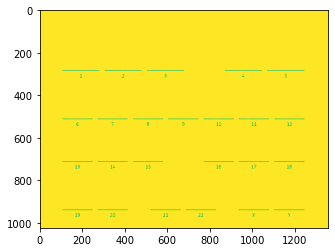

/data1/huangkaibin/karyotype/r_data/imageA/0002A.jpg
255


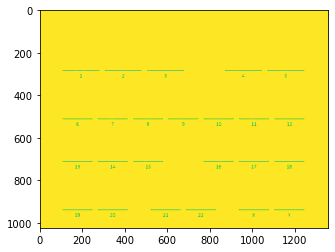

In [70]:
for src_name, tar_name in zip(src_names[:2], tar_names):
    print(tar_name)

#     saveResultDir = './result_r_220107/' + imageANames[idx][-9:-5]
#     os.makedirs(saveResultDir, exist_ok=True)

    src_img = cv2.imread(src_name, cv2.IMREAD_GRAYSCALE)
    tar_img = cv2.imread(tar_name, cv2.IMREAD_GRAYSCALE)

    h, w = tar_img.shape[:2]
    
    theClassBottomPoint = calc_bottom_point(src_img)

#     src_msk = threshold_segm_for_src(src_img)

#     labels = label(src_msk)
#     props  = regionprops(labels)

#     for prop in props:

#         thePickAreaOfImageK = showSpecificArea(src_img, prop.bbox, bg=255)
#         thePickAreaOfMaskK  = showSpecificArea(src_msk, prop.bbox, bg=0)
#         cls = findNearestPoint(theClassBottomPoint, prop.bbox)

In [71]:
r =4 #半径
linewidth = -1 #线的宽度，-1表示实心
color = (0,255,0) #绿色
test = src_img.copy()
for point in theClassBottomPoint:

    cv2.circle(test, point[::-1], r, color, linewidth)

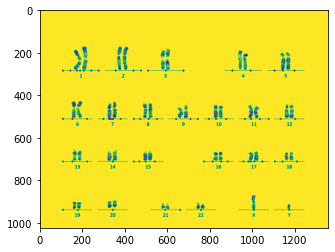

In [72]:
plt.imshow(test)
plt.show()

In [62]:
test = 255 * (src_img>0)
a, b = np.where(src_img==0)

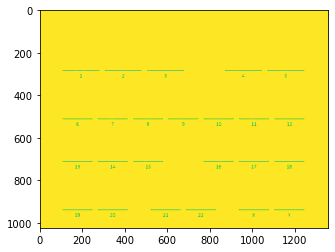

In [63]:
plt.imshow(test)

In [64]:
np.where(test==0)

(array([282, 282, 282, ..., 970, 970, 970]),
 array([ 107,  278,  306, ..., 1000, 1010, 1173]))